<a href="https://colab.research.google.com/github/manjunath1005/Hierarchical_Clustering/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path="/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv"

In [4]:
df=pd.read_csv(path)

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [32]:
x=df.iloc[:,3:].values

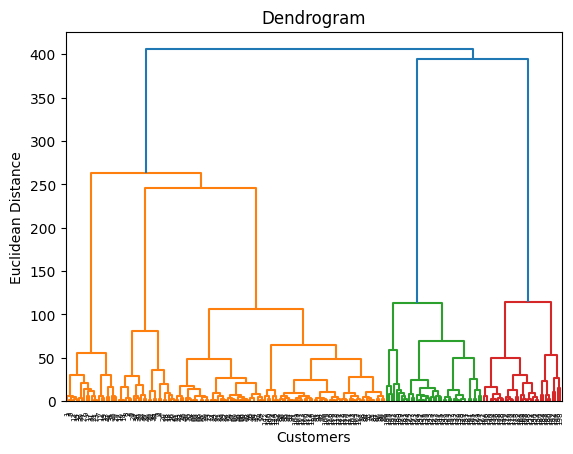

In [9]:
import scipy.cluster.hierarchy as sch

dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=90)
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')

In [11]:
y_hc=hc.fit_predict(x)

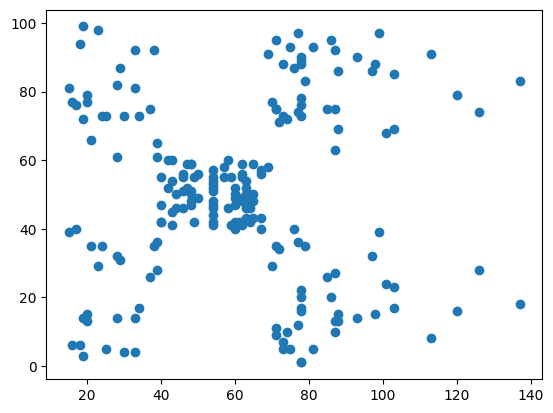

In [12]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

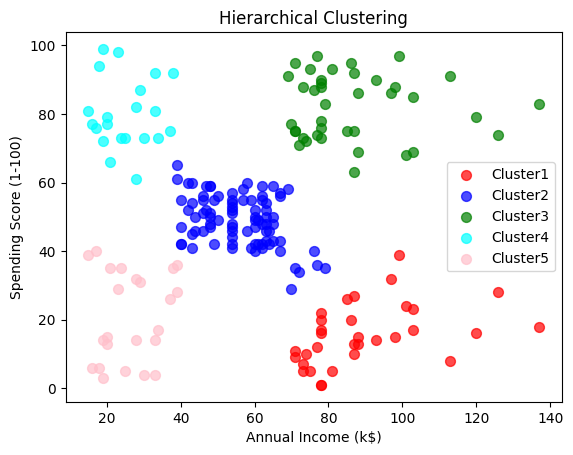

In [13]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=50,alpha=0.7,c='red',label='Cluster1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=50,alpha=0.7,c='blue',label='Cluster2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=50,alpha=0.7,c='green',label='Cluster3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=50,alpha=0.7,c='cyan',label='Cluster4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=50,alpha=0.7,c='pink',label='Cluster5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchical Clustering')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

score=silhouette_score(x,y_hc)
print("Silhoutte Score for Hierarchical Clusering",score)

Silhoutte Score for Hierarchical Clusering 0.5529945955148897


In [15]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("ankurzing/sentiment-analysis-for-financial-news")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sentiment-analysis-for-financial-news' dataset.
Path to dataset files: /kaggle/input/sentiment-analysis-for-financial-news


In [16]:
os.listdir(path)

['all-data.csv', 'FinancialPhraseBank']

In [17]:
data=pd.read_csv(path+'/all-data.csv', encoding='latin1',header=None)

In [18]:
data.to_csv('/news_data.csv', index=False)

In [19]:
data.to_csv('/news_data.csv', index=False)

In [20]:
data.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


A media company publishes thousands of news articles daily.

Problems they face:

 -  Articles are not consistently tagged
 -  Manual categorization is expensive
 -  New topics emerge frequently

The company wants to:

- Automatically group similar news articles
- Discover hidden themes without defining categories upfront
- Build a content recommendation system

They hire you as a Data Analyst to discover natural article groupings using data — without knowing how many topics exist.


In [21]:
data.isnull().sum()

,0
0,0
1,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4846 non-null   object
 1   1       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [23]:
data[0].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming the text data is in column 1 of the 'data' DataFrame
corpus = data[1]

# Initialize TfidfVectorizer with max_features set to 1000
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the corpus to get the TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

print("Shape of TF-IDF features:", X_tfidf.shape)

Shape of TF-IDF features: (4846, 1000)


In [25]:
X_tfidf_dense = X_tfidf.toarray()
print("Converted X_tfidf to a dense array with shape:", X_tfidf_dense.shape)

Converted X_tfidf to a dense array with shape: (4846, 1000)


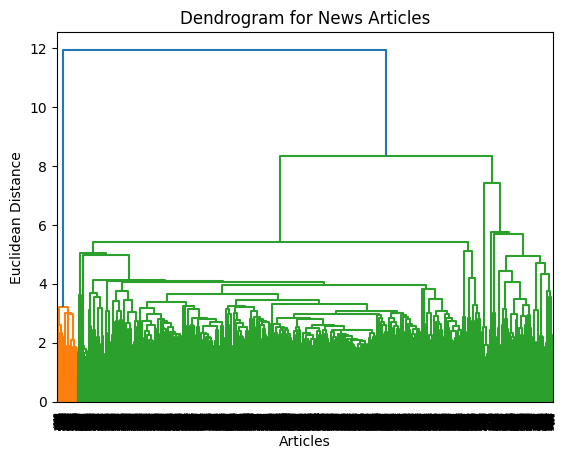

In [26]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(X_tfidf_dense, method='ward'))

plt.title('Dendrogram for News Articles')
plt.xlabel('Articles')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=90)
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering

hc_news = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

y_hierarchical_clusters = hc_news.fit_predict(X_tfidf_dense)

print(f"Shape of cluster labels: {y_hierarchical_clusters.shape}")
print(f"First 10 cluster labels: {y_hierarchical_clusters[:10]}")

Shape of cluster labels: (4846,)
First 10 cluster labels: [2 2 2 2 2 2 0 1 1 1]


In [28]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_tfidf_dense, y_hierarchical_clusters)

print(f"Silhouette Score for Hierarchical Clustering of News Articles: {silhouette_avg:.4f}")

Silhouette Score for Hierarchical Clustering of News Articles: 0.0084


In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf_dense)

print(f"Shape of PCA-transformed data: {X_pca.shape}")

Shape of PCA-transformed data: (4846, 2)


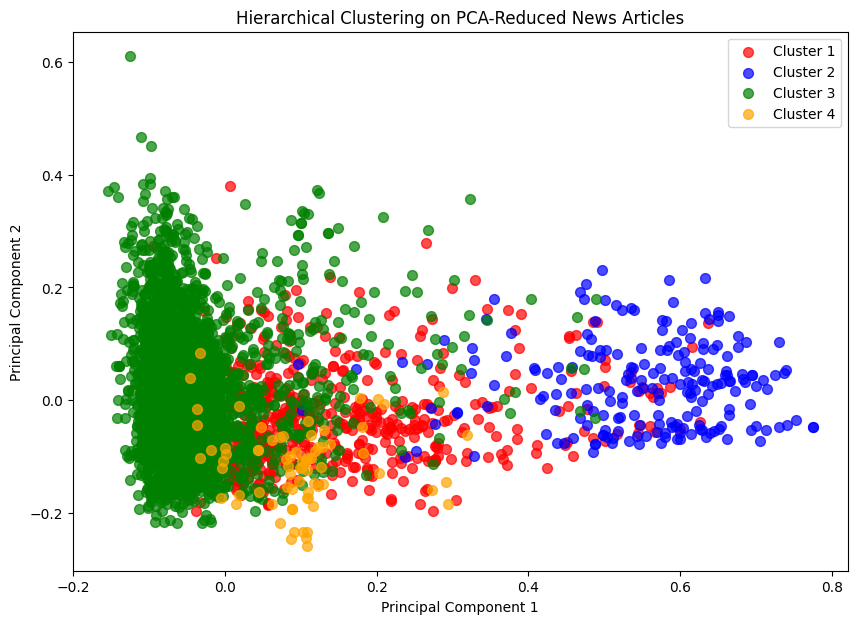

In [31]:
import matplotlib.pyplot as plt

unique_clusters = sorted(list(set(y_hierarchical_clusters)))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

plt.figure(figsize=(10, 7))
for i, cluster_label in enumerate(unique_clusters):
    plt.scatter(X_pca[y_hierarchical_clusters == cluster_label, 0],
                X_pca[y_hierarchical_clusters == cluster_label, 1],
                s=50, c=colors[i % len(colors)], label=f'Cluster {cluster_label + 1}', alpha=0.7)

plt.title('Hierarchical Clustering on PCA-Reduced News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()